In [1]:
import numpy as np
import math
from scipy.integrate import ode
import Kep_2_Cart, Cart_2_Kep
from mpl_toolkits.basemap import Basemap
import filter_functions
import scipy
import scipy.io
import pickle
from IPython.core.debugger import Tracer
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import warnings
warnings.filterwarnings('ignore')

#from mpl_toolkits.basemap import Basemap

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
np.set_printoptions(precision=15)


earth_radius = 6378136.3*1e-3 #km
e_earth = .081819221456 
omega_const = 7.2921158553e-5


#Date of Simulation Details:
#June 24th, 2017 at 6am (this is the date & time at the beginning of the simulation/orbit)
year = 2017
month = 6
day = 24
hour_init = 6
boulder_UT_offset = 6 #Boulder time + 6 hours = UT time
hour_init_UT = hour_init + boulder_UT_offset

In [2]:
#input the ecef x, y, z position of a space obj in order to calculate
#the lat, lon, (radians) and alt of a space obj
def ecef2geo_lat_lon_alt(r_ecef, main_body_radius):
    r = np.linalg.norm(r_ecef)
    altitude = r - main_body_radius
    
    x, y, z = r_ecef.reshape(3, 1)
    latitude = math.asin(z/r)
    
    longitude = math.atan2(y, x)
    #check by using eq. for x
    #x_calc = r*math.cos(latitude)*math.cos(longitude)
    #print(x_calc - x)
    return (latitude, longitude, altitude)

In [3]:
#Read in True Orbit

truth_file = open('Data Files/meas_az_el_range_MultiObj.pkl', 'rb')
mydict2 = pickle.load(truth_file)
truth_file.close()
measurement_array = mydict2['measurement_array']
truth_xyz = mydict2['true_state']
print(np.shape(truth_xyz))
pos_array = truth_xyz[:, 0:3]


(42400, 7)


In [7]:
#loop and calc lat, lon

num_of_objects = 5

stop_index = 1500#np.where(measurement_array[:,0] == 48780)[0][0]
print(stop_index)


lon_array = np.zeros(stop_index)
lat_gd_array = np.zeros(stop_index)

delta_t = 10

for ii in range(stop_index):

    r_eci = pos_array[ii, :]
    
    #Calculations for theta_gmst (rotation btwn ECI & ECEF for the current time of simulation/orbit)--------------
    hour = hour_init_UT + delta_t/(60*60) #hours (float) since midnight UT
    jd = filter_functions.calc_julian_date(year, month, day, hour) #date of interest in UT

    T_UT = (jd - 2451545)/36525 #calc T_UT at this delta_t/date 
    #calculate theta gmst @ 0 hr using the T_UT and the eq. from Vallado 
    theta_gmst_0_hr = math.radians(100.4606184 + 36000.77005361*T_UT + \
                                           .00038793*T_UT**2 - 2.6e-8*T_UT**3)
    seconds = hour * 60 * 60 #seconds since midnight UT 
    #calculate theta gmst using theta gmst @ 0 hr and seconds 
    #since midnight*the rotation rate of earth
    theta_gmst = theta_gmst_0_hr + omega_const * seconds 
    theta_gmst = theta_gmst % (2*math.pi)
        
    
    r_ecef = filter_functions.eci2ecef(r_eci, theta_gmst)
    

    #step f
    latitude, longitude, altitude = ecef2geo_lat_lon_alt(r_ecef, earth_radius)
    
    #step g
    latitude_geodetic = math.atan2(math.tan(latitude), 1-e_earth**2)

    lon_array[ii] = longitude
    lat_gd_array[ii] = latitude_geodetic
    
    delta_t = delta_t + 10

1500


1 b
2 g
3 r
4 c
5 m


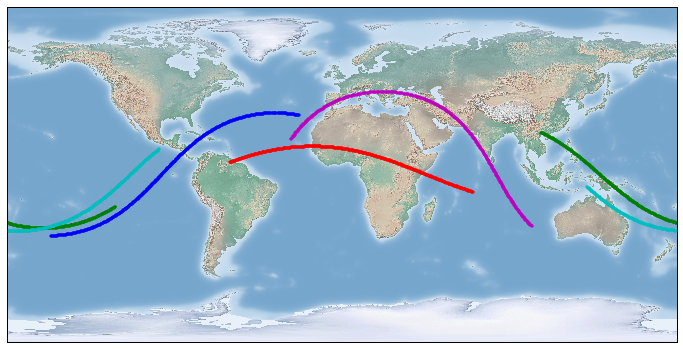

In [8]:

#determine indices for each object




fig = plt.figure(figsize=(12,8))
#create simple basemap obj
m = Basemap()
# add coastlines to basemap
#m.drawcoastlines()
m.shadedrelief()




colors = np.array(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'])

count = 0

for ii in range(num_of_objects):

    print((ii+1), colors[count])
    

    obj_indices = np.where(measurement_array[:stop_index, 2] == (ii+1))[0]

    
    #plot the groudtrack (lat & lon values) on basemap 
    m.scatter(np.degrees(lon_array[obj_indices]), \
                          np.degrees(lat_gd_array[obj_indices]), marker='.', color=colors[count])
    
    count = count + 1
    if count == 8:
        count = 0


#fig.savefig('Figures/GroundTrack.png')

In [ ]:

#determine indices for each object
  

indices_1 = np.where(measurement_array[:stop_index, 2] == 1)[0]
indices_2 = np.where(measurement_array[:stop_index, 2] == 2)[0]
indices_3 = np.where(measurement_array[:stop_index, 2] == 3)[0]
#indices_4 = np.where(measurement_array[:stop_index, 2] == 4)[0]



fig = plt.figure(figsize=(12,8))
#create simple basemap obj
m = Basemap()
# add coastlines to basemap
#m.drawcoastlines()
m.shadedrelief()
#plot the groudtrack (lat & lon values) on basemap 
m.scatter(np.degrees(lon_array[indices_1]), np.degrees(lat_gd_array[indices_1]), marker='.', color='m')
m.scatter(np.degrees(lon_array[indices_2]), np.degrees(lat_gd_array[indices_2]), marker='.', color='g')
m.scatter(np.degrees(lon_array[indices_3]), np.degrees(lat_gd_array[indices_3]), marker='.', color='r')
#m.scatter(np.degrees(lon_array[indices_4]), np.degrees(lat_gd_array[indices_4]), marker='.', color='k')


fig.savefig('Figures/GroundTrack.png')

In [14]:
indices = np.where(measurement_array[:, 1] == 1)[0]
print(indices)
indices = np.where(measurement_array[:, 1] == 2)[0]
print(indices)
indices = np.where(measurement_array[:, 1] == 3)[0]
print(indices)


indices = np.where(measurement_array[:, 2] == 1)[0]
print(indices)
indices = np.where(measurement_array[:, 2] == 2)[0]
print(indices)
indices = np.where(measurement_array[:, 2] == 3)[0]
print(indices)

[ 35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67 175 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 330 331 332 333 334 335 336 337
 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355
 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373
 374 375 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391
 392 393 394 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409
 410 411 412 413 414 415 416 417 418 419 420 421 422 423 424 425 426 427
 428 429 430 431 432 433 434 435 436 437 505 506 507 508 509 510 511 512
 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529 530
 531 532 533 534 535 536 537 538 539 540 541 542 54

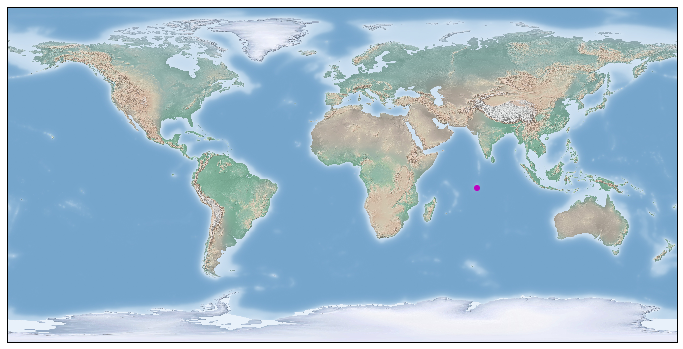

In [20]:

#determine indices for each object




fig = plt.figure(figsize=(12,8))
#create simple basemap obj
m = Basemap()
# add coastlines to basemap
#m.drawcoastlines()
m.shadedrelief()


#Madrid Station (DSS 65) -- correct position of Madrid Station
#Goldstone Station (DSS 13) California
#Diego Garcia, British Indian Ocean Territory 7.41173°S 72.45222°E., Space Fence (Dedicated Sensor
station_lons = np.radians(np.array([355.749444, 243.205, 72.45222])) #
station_lats = np.radians(np.array([40.427222, 35.247164, -7.41173])) #


station_lats_gd = np.zeros((len(station_lons)))
for ii in range(len(station_lons)):
    station_lats_gd[ii] = math.atan2(math.tan(station_lats[ii]), 1-e_earth**2)



m.scatter(np.degrees(station_lons), np.degrees(station_lats_gd), s=100, marker='.', color='m')


fig.savefig('Figures/GroundTrack.png')

In [6]:
stop_index

23585